<a href="https://colab.research.google.com/github/Umerfarooq122/Weighted-Least-Squares-and-Robust-Regression-in-Python/blob/main/Blog_3_Weighted_Least_Squares_and_Robust_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weighted Least Squares and Robust Regression in Python**

Weighted Least Squares (WLS) is a variation of the ordinary least squares (OLS) method used in regression analysis. In OLS, the goal is to minimize the sum of squared differences between the observed values and the values predicted by the regression model. However, in some cases, the assumption of homoscedasticity (constant variance of errors) may not hold, and the errors may have different variances across observations.

Weighted Least Squares addresses this issue by assigning different weights to different observations, allowing for heteroscedasticity in the data. The basic idea is to give more weight to observations with smaller errors and less weight to observations with larger errors. This way, the regression model is more influenced by observations with lower variance in their errors.

## **Loading Libraries**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **Importing and Preprocessing Data Set:**

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/linear-regression-and-box-cox-transformation-in-python/main/insurance.csv')

In [39]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [40]:
cat_cols = ["sex","smoker","region"]
df_encode = pd.get_dummies(data = data, prefix ='OHE', prefix_sep= '_',
                           columns= cat_cols,drop_first= True, dtype= 'int8')

In [41]:
df_encode.head()

,age,bmi,children,expenses,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275221,  7.42678148,  7.83081075,  8.23484002,  8.63886928,
         9.04289855,  9.44692782,  9.85095708, 10.25498635, 10.65901562,
        11.06304488]),
 <BarContainer object of 10 artists>)

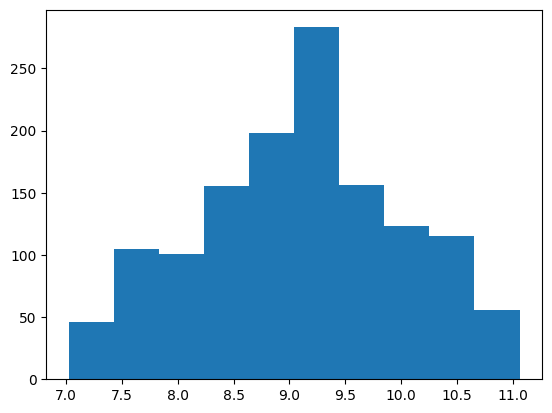

In [42]:
plt.hist(np.log(df_encode['expenses']))

## **Weighted Least Squares:**

In [60]:
X = df_encode.drop(['expenses'], axis = 1)
y = df_encode['expenses']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Add a constant term to the independent variable matrix for the intercept
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [63]:

weights = 1 / np.square(y_train - sm.OLS(y_train, X_train_scaled).fit().predict(X_train_scaled))

wls_model = sm.WLS(y_train, X_train_scaled, weights=weights)

In [64]:
weights

560     2.301992e-07
1285    2.529826e-05
1142    3.102357e-09
969     1.567748e-07
486     1.767557e-07
            ...     
1095    5.665357e-06
1130    1.068291e-06
1294    4.273470e-06
860     1.292372e-08
1126    6.526457e-07
Name: expenses, Length: 1070, dtype: float64

In [65]:
# Fit the model
wls_results = wls_model.fit()

# Display the regression results
print(wls_results.summary())

                            WLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.657e+06
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:39:48   Log-Likelihood:                -9743.5
No. Observations:                1070   AIC:                         1.951e+04
Df Residuals:                    1061   BIC:                         1.955e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.317e+04     33.063    398.331      0.0

In [66]:
wls_prediction = wls_results.predict(X_test_scaled)

In [67]:
wls_resid = wls_results.resid

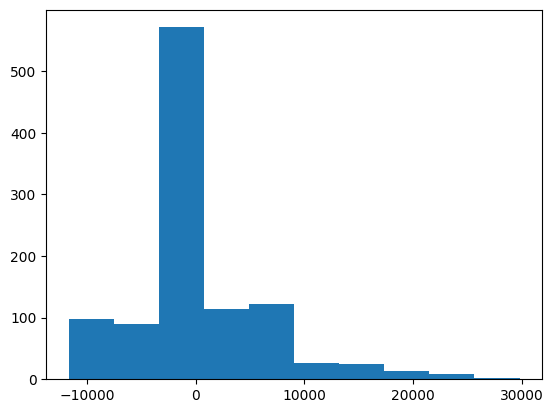

In [68]:
plt.hist(wls_resid)
plt.show()

Text(0.5, 1.0, 'Residuals vs Fitted Values')

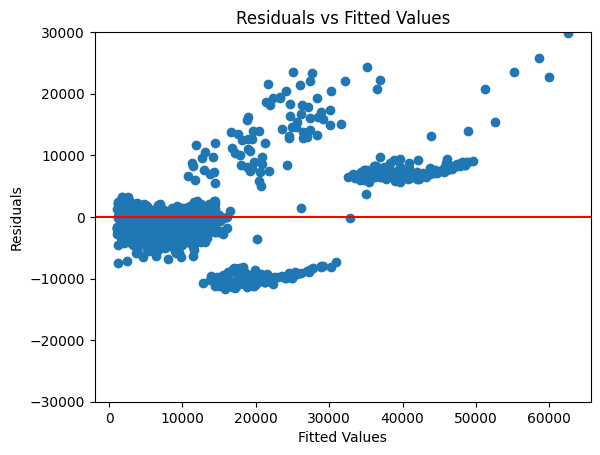

In [69]:
plt.scatter(y_train , wls_resid)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylim(-30000,30000)
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

## **Robust Regression:**

                    Robust linear Model Regression Results                    
Dep. Variable:               expenses   No. Observations:                 1338
Model:                            RLM   Df Residuals:                     1329
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 21 Nov 2023                                         
Time:                        22:40:08                                         
No. Iterations:                    30                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4955.4163    196.040    -25.278

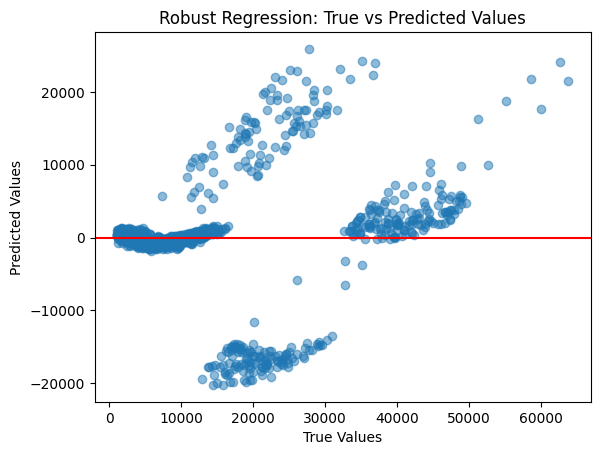

In [70]:
X = sm.add_constant(X)

# Fit robust regression using RANSAC
model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())

'''
#predicted = cross_val_predict(model, X, y, cv=5)  # 5-fold cross-validation

# Plot the predicted values against the true values
plt.scatter(y, predicted, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Robust Regression with Cross-Validation: True vs Predicted Values')
plt.show()
'''
# Plot the predicted values against the true values
plt.scatter(y, results.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Robust Regression: True vs Predicted Values')
plt.show()


## **Conclusion:**

As we can see that even weighted least sqaure or Robust regression also failed to make a compelling model since they are good to take care of heteroscedasticity but this data set does not a have heteroscedasticity but in fact a non linear and non normal distribution of our target column for which we have to explore other techniques.